## OG-USA Output Demonstration
#### August 19, 2019

This notebook illustrates how to visualize and summarize the results of policy simulations from [`OG-USA`](https://github.com/PSLmodels/OG-USA)).  `OG-USA` is computationally intensive to run (often taking several hours to compute a solution) and therefore this notebook works with cached results.  The simulaitons here represent the impact on the U.S. economy of the so-called Tax Cuts and Jobs Act of 2017 (with the exception of some parts of the legistlation that are outside the scope of the model's capabilities).

### The Tax Cuts and Jobs Act
The TCJA is an interesting reform to look at since it represents a large change in tax policy.  Among the changes modeled here:
* Reductions in marginal rates on income taxes
* A special deduction for pass-through business income
* The elmination of the personal exemption
* Limitations on certain itemized deductions
* An expansion of the child tax credit
* An expansion of the standard deduction
* A lower corporate tax rate
* Full expensing of certain investments


#### Setup
Before running this notebook, you must open a terminal window and install the `OG-USA` (ogusa) package. This package must be cloned and set up in a specific environment. Please follow the instructions in the main [`README.md`](https://github.com/PSLmodels/OG-USA/blob/master/README.md).

In [1]:
# imports
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# import OG-USA modules
from ogusa import output_plots as op
from ogusa import output_tables as ot
from ogusa import parameter_tables as pt
from ogusa import parameter_plots as pp
# to print matplotlib plots inline
%matplotlib inline

In [2]:
# Load in OG-USA results and parameterizations
base_ss = pickle.load(open('./TCJA_Results/OUTPUT_BASELINE/partial/SS/SS_vars.pkl', 'rb'))
base_tpi = pickle.load(open('./TCJA_Results/OUTPUT_BASELINE/partial/TPI/TPI_vars.pkl', 'rb'))
base_params = pickle.load(open('./TCJA_Results/OUTPUT_BASELINE/partial/model_params.pkl', 'rb'))
base_taxfunctions = pickle.load(open('./TCJA_Results/OUTPUT_BASELINE/partial/TxFuncEst_baseline.pkl', 'rb'))
reform_ss = pickle.load(open('./TCJA_Results/OUTPUT_REFORM/partial/SS/SS_vars.pkl', 'rb'))
reform_tpi = pickle.load(open('./TCJA_Results/OUTPUT_REFORM/partial/TPI/TPI_vars.pkl', 'rb'))
reform_params = pickle.load(open('./TCJA_Results/OUTPUT_REFORM/partial/model_params.pkl', 'rb'))
reform_taxfunctions = pickle.load(open('./TCJA_Results/OUTPUT_REFORM/partial/TxFuncEst_policy.pkl', 'rb'))

## Effects of the TCJA on tax rates

We can start by considering how invidual income tax rates were changed by the new law.  This will be helpful to identify have the average burden changes over time as a result of the reform.

### changes in effective tax rates:

In [3]:
# Table of tax rates:
pt.tax_rate_table(base_taxfunctions, base_params, reform_taxfunctions,
                   reform_params, rate_type='ETR', table_format=None)

Year,2019,2020,2021,2022,2023,2024,2025,2026,2027
Year,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000,2024.000000,2025.000000,2026.000000,2027.000000
Baseline Effective Tax Rates,18.426110,18.326140,18.194360,18.060451,17.925931,17.794872,17.671344,17.547696,17.422387
Reform Effective Tax Rates,17.234012,17.156599,17.048843,16.925989,16.814434,16.706116,16.593770,17.659244,17.548882
Difference,-1.192098,-1.169541,-1.145517,-1.134463,-1.111497,-1.088756,-1.077574,0.111549,0.126495


## Effects of the TCJA on macroeconomic aggregates

We begin this illustration by showing the effect of the TCJA on macroeconomic aggregates.  The OG model gives these aggregates in model units (which equate to units of GDP).  Therefore, it's often useful to look at the effects of the reform policy in terms of the changes relative to the baseline.  

Here are percentage changes in macro aggregates as a result of the TCJA:

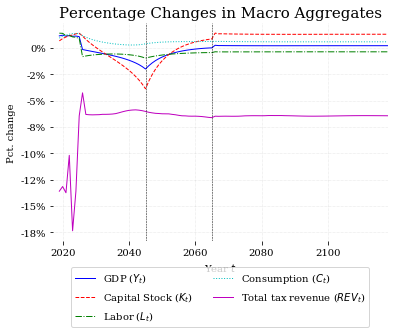

In [7]:
# Plot OG-USA output; percentage changes in macro vars (Y, K, L, C)
pct_chg_plot = op.plot_aggregates(base_tpi, base_params, reform_tpi=reform_tpi,
                    reform_params=reform_params,
                    var_list=['Y', 'K', 'L', 'C', 'total_revenue'], plot_type='pct_diff',
                    num_years_to_plot=100,
                    vertical_line_years=[
                        base_params.start_year + base_params.tG1,
                        base_params.start_year + base_params.tG2],
                    plot_title='Percentage Changes in Macro Aggregates')

### in table format:

In [ ]:
# table of output
ot.macro_table(base_tpi, base_params, reform_tpi=reform_tpi,
                    reform_params=reform_params)

# Effect on government debt

We can see above that while the tax change has positive effects on GDP and other economic aggregates over the first few years, the effects of the policy on macro outcomes become negative after 2026.

Part of the reason for this is that several components of the policy are temporary.  E.g., the individual rate cuts and the special deduction for pass-through business owners expire after 2025.

Another issue affecting long run outcomes are the large budget deficits that need to be financed by more government borrowing.  The increase in borrowing increases the demand for loanable funds and pushes up interest rates.  Higher interest rates result in a lower quantity of capital demaned.

We can see this by looking at the path of government debt:

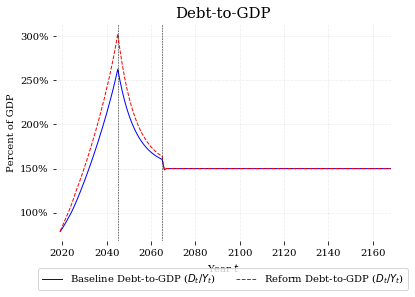

In [5]:
# Plot OG-USA output; government debt
dplot = op.plot_gdp_ratio(base_tpi, base_params, reform_tpi, reform_params,
                   var_list=['D'], num_years_to_plot=150,
                   start_year=2019, vertical_line_years=[
                           base_params.start_year + base_params.tG1,
                           base_params.start_year + base_params.tG2],
                   plot_title='Debt-to-GDP')

### we can also look at interest rates:

In [ ]:
# Plot OG-USA output; interest rates
rplot = op.plot_aggregates(
    base_tpi, base_params, reform_tpi=reform_tpi,
    reform_params=reform_params, var_list=['r'],
    plot_type='levels', num_years_to_plot=150,
    vertical_line_years=[
        base_params.start_year + base_params.tG1,
        base_params.start_year + base_params.tG2],
    plot_title='Real Interest Rates Under Baseline and Reform')

### wage rates...

In [ ]:
# Plot OG-USA output; wage rates
rplot = op.plot_aggregates(
    base_tpi, base_params, reform_tpi=reform_tpi,
    reform_params=reform_params, var_list=['w'],
    plot_type='levels', num_years_to_plot=150,
    vertical_line_years=[
        base_params.start_year + base_params.tG1,
        base_params.start_year + base_params.tG2],
    plot_title='Real Wage Rates Under Baseline and Reform')

In [ ]:
pct_chg_plot = op.plot_aggregates(base_tpi, base_params, reform_tpi=reform_tpi,
                    reform_params=reform_params,
                    var_list=['w'], plot_type='pct_diff',
                    num_years_to_plot=10,
                    vertical_line_years=[
                        base_params.start_year + base_params.tG1,
                        base_params.start_year + base_params.tG2],
                    plot_title='Percentage Changes in Wage Rates')

## Distributional analysis

Given the heterogenity in the model - differences in households by age and lifetime income group - we can conduct distributional analysis with the model.

Consider the differences in earnings profiles across groups:

In [ ]:
# earnings profiles
fig2 = pp.plot_ability_profiles(base_params, include_title=True)


These differences in earnings mean that the changes in marginal and effective tax rates, which vary by income, are doing to have differential impacts across these groups.

In [ ]:
# plot effects by group
bar = op.ability_bar(base_tpi, base_params, reform_tpi,
                reform_params, var='n_mat')

### effects across the lifecycle (SS results):

In [ ]:
# plot profiles from SS
fig1 = op.ss_profiles(base_ss, base_params, reform_ss, reform_params,
                      var='nssmat')

In [ ]:
# plot profiles from SS
fig1 = op.ss_profiles(base_ss, base_params, reform_ss, reform_params,
                      var='bssmat_splus1')

In [ ]:
# plot labor profiles from SS along with data
fig1 = op.ss_profiles(base_ss, base_params, by_j=False, var='nssmat', plot_data=True)